# **Observed sea ice extend, decadal trend**

Plots the observed sea ice extend change (1981-2020) for Nov-Mar.

In [1]:
import matplotlib.pyplot as plt
import xarray as xr
import numpy as np
import calendar
import cartopy.crs as ccrs
import cartopy.feature as cfeature
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m')

# Set some plotting defaults
plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['figure.dpi'] = 100

### **Read ice concentration data**
NOAA OISST ice concentration 1981-2021, retrieved from:
https://psl.noaa.gov/data/gridded/data.noaa.oisst.v2.html

In [2]:
data_directory = '/home/users/train033/data/'

In [3]:
dataset = xr.open_dataset(data_directory+'icec.mnmean.nc')
x,y = np.meshgrid(dataset.lon.values, dataset.lat.values)
dataset

<xarray.Dataset>
Dimensions:    (lat: 180, lon: 360, nbnds: 2, time: 473)
Coordinates:
  * lat        (lat) float32 89.5 88.5 87.5 86.5 ... -86.5 -87.5 -88.5 -89.5
  * lon        (lon) float32 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * time       (time) datetime64[ns] 1981-12-01 1982-01-01 ... 2021-04-01
Dimensions without coordinates: nbnds
Data variables:
    icec       (time, lat, lon) float32 ...
    time_bnds  (time, nbnds) datetime64[ns] ...
Attributes:
    title:          NOAA Optimum Interpolation (OI) SST V2
    Conventions:    CF-1.0
    history:        Wed Apr  6 13:51:42 2005: ncks -d time,0,278 SAVEs/icec.m...
    comments:       Data described in  Reynolds, R.W., N.A. Rayner, T.M.\nSmi...
    platform:       Model
    source:         NCEP Climate Modeling Branch
    institution:    National Centers for Environmental Prediction
    References:     https://www.psl.noaa.gov/data/gridded/data.noaa.oisst.v2....
    NCO:            4.0.0
    dataset_title:  NOAA Optimum Interpolation (OI) SST V2
    source_url:     http://www.emc.ncep.noaa.gov/research/cmb/sst_analysis/

### **Plot decadal sea ice edge for given month**

Text(0.5, 1.0, 'Observed sea ice edge - January 1982-2020')

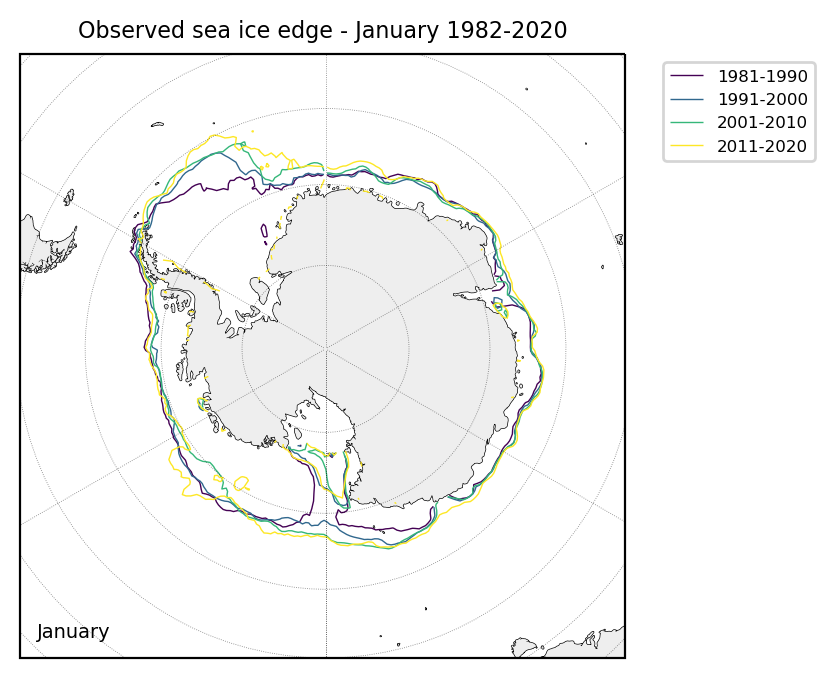

In [30]:
from matplotlib import cm
import matplotlib

month = 1

cmap = matplotlib.cm.get_cmap('viridis')

lines = []
labels = []
i = 0

fig=plt.figure(dpi=200)
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=0, central_latitude=-90, globe=None))
ax.coastlines(resolution='50m',linewidth=0.5)
ax.set_extent([-180,180,-50,-90],crs=ccrs.PlateCarree()) 
ax.gridlines(linewidth=0.3, color='k', alpha=0.5, linestyle=':')

for i in range(4):
    yr = str(1981+i*10)
    yr2 = str(1990+i*10)
    data = dataset.sel(time=slice(yr+"-"+str("{:02d}".format(month)),yr2+"-"+str("{:02d}".format(month))))
    data_month = data.groupby('time.month').mean('time')
    rgba = cmap(i/3)
    contour = plt.contour(x, y, data_month.icec.sel(month=month), levels=[15], colors=[rgba], linewidths=0.5, transform=ccrs.PlateCarree())
    
    lines.extend(contour.collections)
    if yr==1981:
        labels.extend(['1982-1990'])
    else:
        labels.extend([yr+'-'+yr2])
    i += len(contour.collections)
plt.legend(lines, labels, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=6)
ax.add_feature(land_50m, facecolor='#eeeeee')
plt.title('Observed sea ice edge - '+calendar.month_name[month]+' 1982-2020',fontsize=8)
#plt.savefig('./figures/observed_sie_jan1982_2020.png')

### **Plot sea ice edge Nov-Mar**

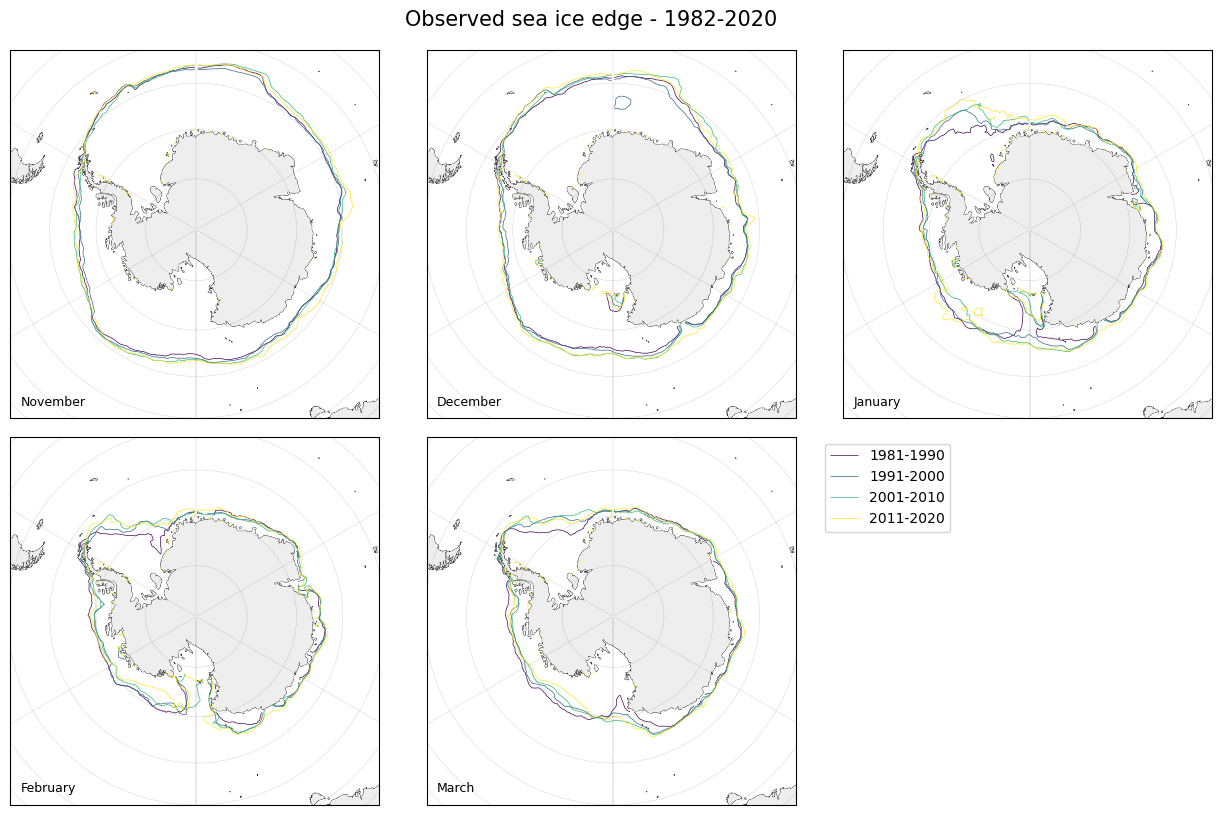

In [59]:
from matplotlib import cm
import matplotlib
import matplotlib.gridspec as gridspec
cmap = matplotlib.cm.get_cmap('viridis') 


months = [11,12,1,2,3]

fig = plt.figure(figsize=(16,10))
projection=ccrs.Orthographic(central_longitude=0, central_latitude=-90, globe=None)

gs1 = gridspec.GridSpec(2, 3)
gs1.update(wspace=0.025, hspace=0.05)

for j in range(len(months)):
    lines = []
    labels = []
    i = 0
    
    ax = plt.subplot(gs1[j], projection=ccrs.Orthographic(central_longitude=0, central_latitude=-90, globe=None))
    ax.coastlines(resolution='50m',linewidth=0.5)
    ax.set_extent([-180,180,-50,-90],crs=ccrs.PlateCarree()) 
    ax.gridlines(linewidth=0.3, color='k', alpha=0.5, linestyle=':')

    for i in range(4):
        yr = str(1981+i*10)
        yr2 = str(1990+i*10)
        data = dataset.sel(time=slice(yr+"-"+str("{:02d}".format(months[j])),yr2+"-"+str("{:02d}".format(months[j]))))
        data_month = data.groupby('time.month').mean('time')
        rgba = cmap(i/3)
        contour = plt.contour(x, y, data_month.icec.sel(month=months[j]), levels=[15], colors=[rgba], linewidths=0.5, transform=ccrs.PlateCarree())
    
        lines.extend(contour.collections)
        if yr==1981:
            labels.extend(['1982-1990'])
        else:
            labels.extend([yr+'-'+yr2])
        i += len(contour.collections)
    
    ax.add_feature(land_50m, facecolor='#eeeeee')
    ax.text(-135, -32, calendar.month_name[months[j]], size=9, transform=ccrs.PlateCarree())
    
plt.legend(lines, labels, bbox_to_anchor=(1.06, 1), loc='upper left', fontsize=10)
plt.suptitle('Observed sea ice edge - 1982-2020', y=0.92, fontsize=15)
plt.savefig('./figures/observed_sie_1982_2020.png')